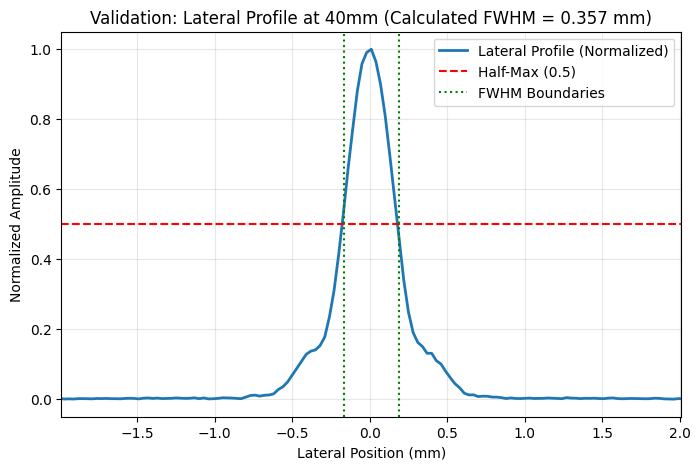

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Load the processed data for the middle case
data = np.load("processed_rf_data_3.0MHz_40mm.npz")
lateral_profile = data['lateral_profile']
x_axis = data['x_axis'] * 1000  # Convert to mm
fwhm = data['fwhm_lateral']

# Normalize for plotting
profile_norm = lateral_profile / np.max(lateral_profile)

plt.figure(figsize=(8, 5))
plt.plot(x_axis, profile_norm, label='Lateral Profile (Normalized)', linewidth=2)
plt.axhline(0.5, color='r', linestyle='--', label='Half-Max (0.5)')

# Add arrows or lines indicating the measured width
center_idx = np.argmax(profile_norm)
center_x = x_axis[center_idx]
half_width = fwhm / 2

plt.axvline(center_x - half_width, color='g', linestyle=':', label='FWHM Boundaries')
plt.axvline(center_x + half_width, color='g', linestyle=':')

plt.title(f"Validation: Lateral Profile at 40mm (Calculated FWHM = {fwhm:.3f} mm)")
plt.xlabel("Lateral Position (mm)")
plt.ylabel("Normalized Amplitude")
plt.legend()
plt.grid(True, alpha=0.3)
plt.xlim(center_x - 2, center_x + 2) # Zoom in
plt.show()